In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import yaml

In [2]:
from xopt import Xopt

In [3]:
YAML="""
xopt: {output_path: null, verbose: true,
  algorithm: cnsga}
  
algorithm:
  name: cnsga
  options: {max_generations: 16, population_size: 24, crossover_probability: 0.9, mutation_probability: 1.0,
  selection: auto, verbose: true, population: null}

simulation:
  name: epics_ca
  evaluate: virtual_machine.evaluate.evaluate_epics_ca
  options:
    pv_file: vb24@test.sim.pvs.yaml
    pause: 1.5
  

# Note that you can call another file in the top level group:
vocs:

  name: cu-dcgun
  description: Test-case
  simulation: epics_ca

  variables: 
    vb24@test:laser:sigma_xy:  [1.0, 10]
    vb24@test:laser:alpha_xy:  [0.1, 1.0]
    vb24@test:sol1:current:    [0.0, 5.0]
    vb24@test:sol2:current:    [0.0, 5.0]

  objectives:
    vb24@test:scr1:sigma_x:   MAXIMIZE
    vb24@test:beam:radiation: MINIMIZE
    
  constants:
    vb24@test:gun:voltage: 300
    
  constraints:
    vb24@test:beam:radiation: [GREATER_THAN, 0]

"""
config = yaml.safe_load(YAML)

# Make Xopt object and run:

In [30]:
X = Xopt(config=config)

Loading config as dict.


In [31]:
x=X.random_evaluate()
print(x['error'])

False


In [32]:
X.run_cnsga(executor=None)




 ▄████▄   ███▄    █   ██████   ▄████  ▄▄▄      
▒██▀ ▀█   ██ ▀█   █ ▒██    ▒  ██▒ ▀█▒▒████▄    
▒▓█    ▄ ▓██  ▀█ ██▒░ ▓██▄   ▒██░▄▄▄░▒██  ▀█▄  
▒▓▓▄ ▄██▒▓██▒  ▐▌██▒  ▒   ██▒░▓█  ██▓░██▄▄▄▄██ 
▒ ▓███▀ ░▒██░   ▓██░▒██████▒▒░▒▓███▀▒ ▓█   ▓██▒
░ ░▒ ▒  ░░ ▒░   ▒ ▒ ▒ ▒▓▒ ▒ ░ ░▒   ▒  ▒▒   ▓▒█░
  ░  ▒   ░ ░░   ░ ▒░░ ░▒  ░ ░  ░   ░   ▒   ▒▒ ░
░           ░   ░ ░ ░  ░  ░  ░ ░   ░   ░   ▒   
░ ░               ░       ░        ░       ░  ░
░                                              


Continous Non-dominated Sorting Genetic Algorithm


No executor given. Running in serial mode.
Creating toolbox from vocs.
Warning in cnsga_toolbox: Redefining creator.Individual
Created toolbox with 4 variables, 1 constraints, and 2 objectives.
    Using selection algorithm: nsga2
vocs:
{'constants': {'vb24@test:gun:voltage': 300},
 'constraints': {'vb24@test:beam:radiation': ['GREATER_THAN', 0]},
 'description': 'Test-case',
 'linked_variables': None,
 'name': 'cu-dcgun',
 'objectives': {'vb24@test:beam:radi

In [23]:
radiation = [ out['vb24@test:beam:radiation'] for out in X.population['outputs'] ]
dsigma_xy = [ out['vb24@test:scr1:sigma_x']   for out in X.population['outputs'] ]

Text(0, 0.5, 'spot size at dump (mm)')

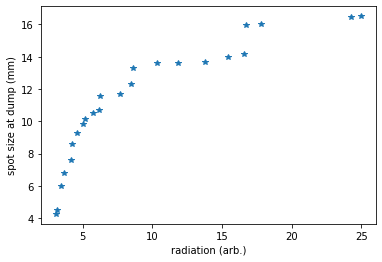

In [29]:
from matplotlib import pyplot as plt
plt.plot(radiation, dsigma_xy, '*');
plt.xlabel('radiation (arb.)')
plt.ylabel('spot size at dump (mm)')